In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [14]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("/kaggle/input/supervisedlearning/magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [15]:
df["class"] = (df["class"] == "g").astype(int)

In [16]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

Preparing Data

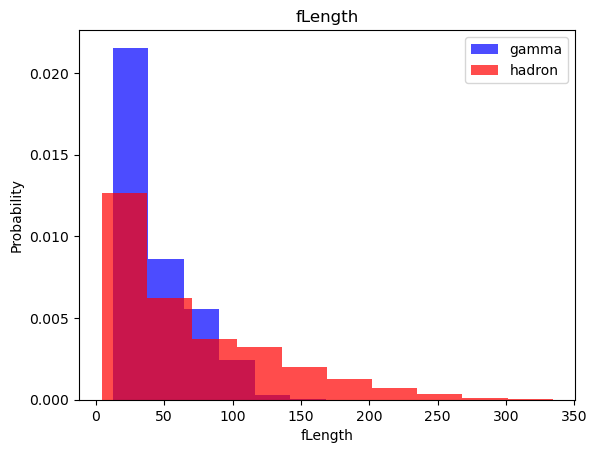

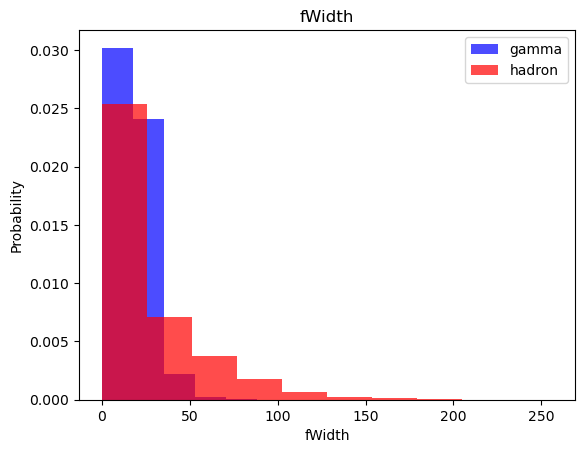

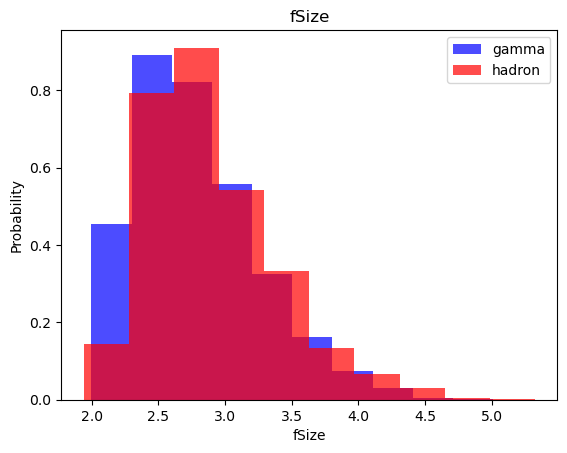

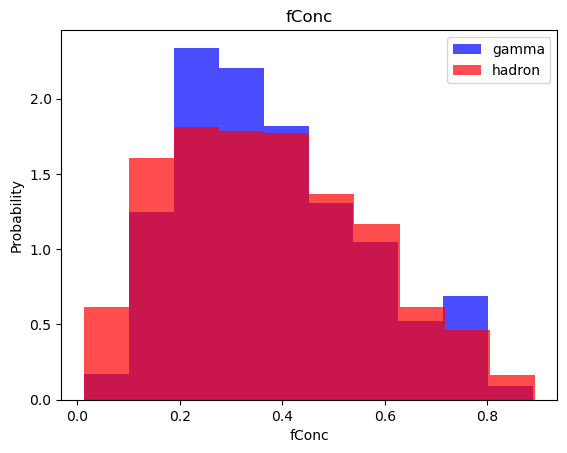

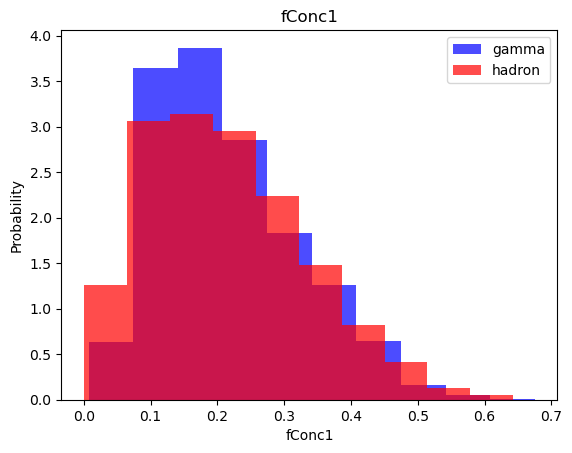

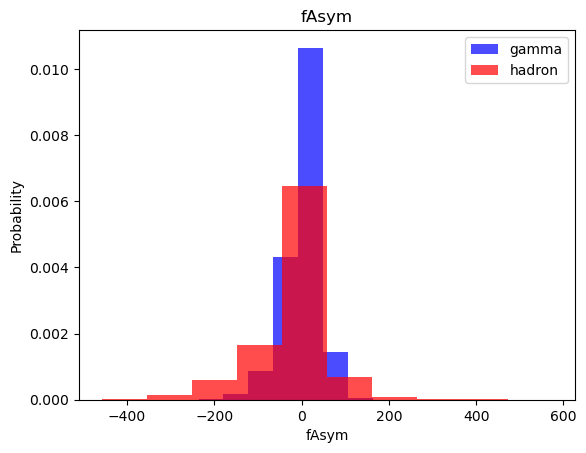

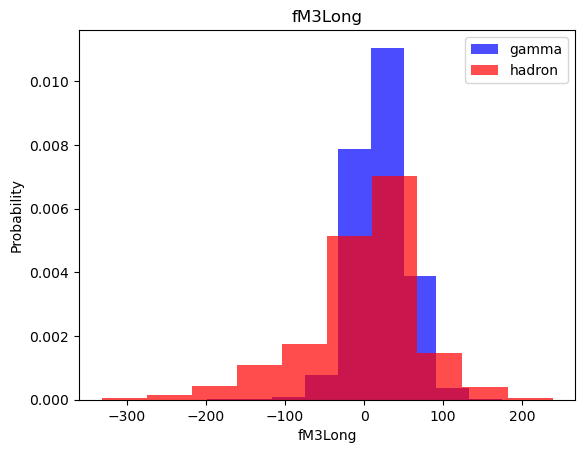

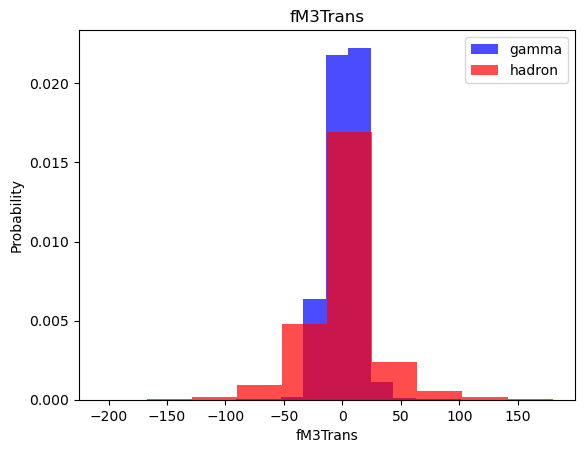

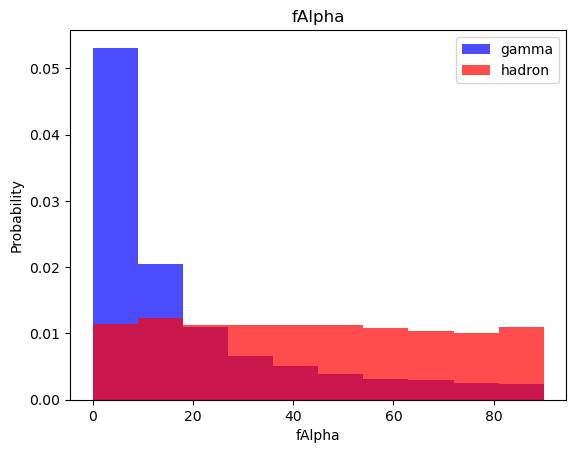

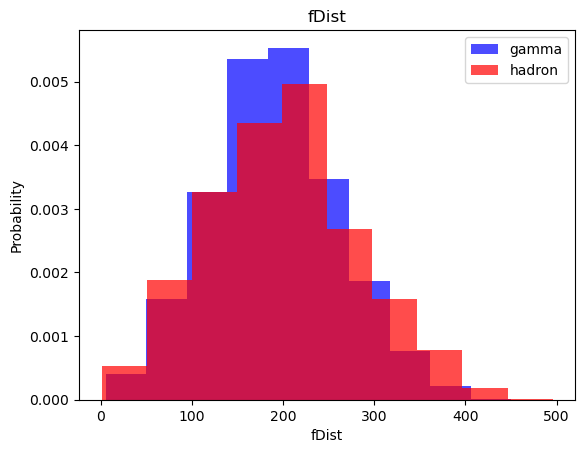

In [17]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, validation, test datasets

In [18]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [19]:
''' if u look at the data, the numbers are way off, they are in hundreds and some are in points,
this can affecr our results. hence we scale these so that the numbers are relative to the mean and
the standard deviation.'''

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [20]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn_model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1294
           1       0.87      0.85      0.86      2510

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [27]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51      1294
           1       0.75      0.89      0.81      2510

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Neural Network

In [28]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [29]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [30]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


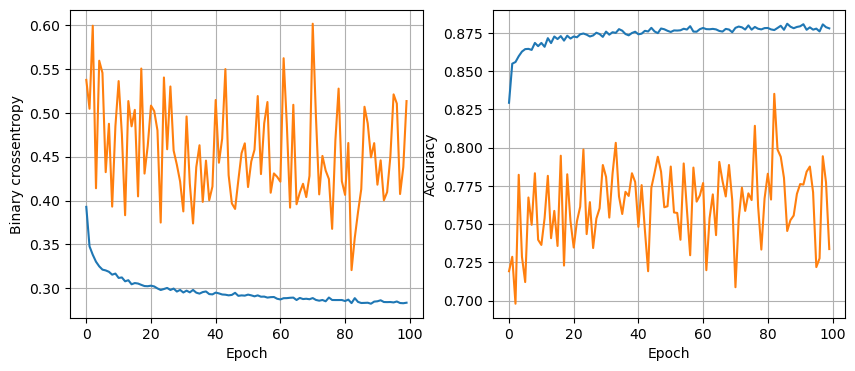

119/119 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.01, batch size 64


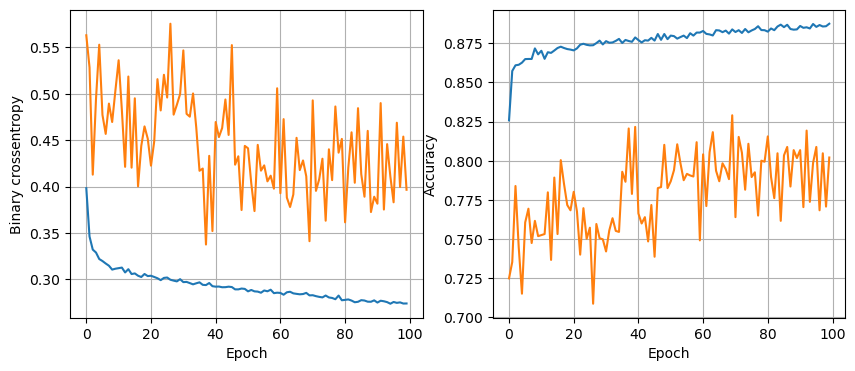

119/119 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.01, batch size 128


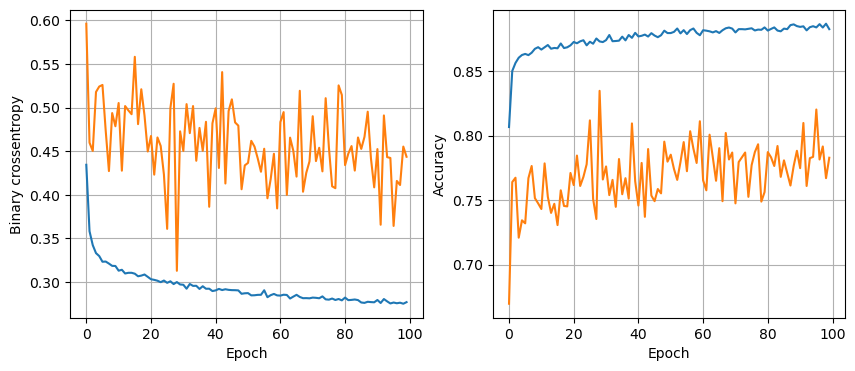

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.005, batch size 32


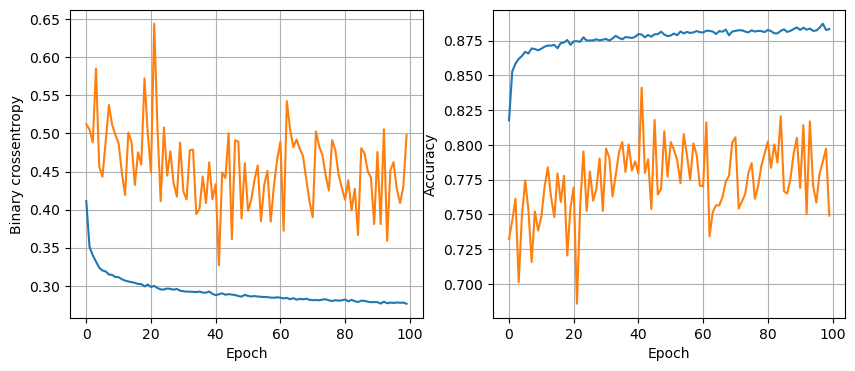

119/119 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8620
16 nodes, dropout 0, lr 0.005, batch size 64


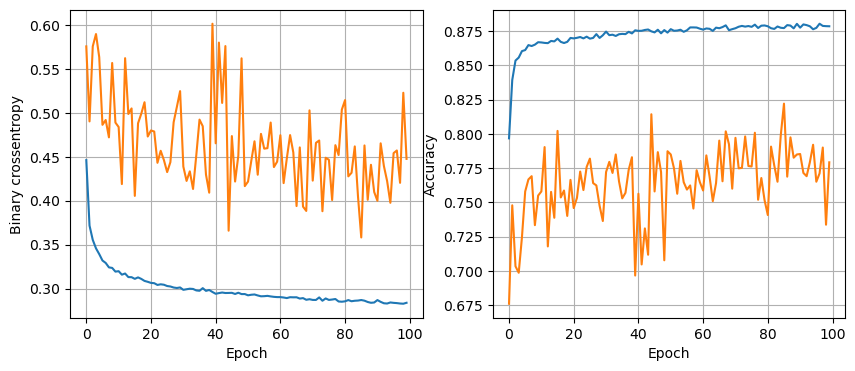

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.005, batch size 128


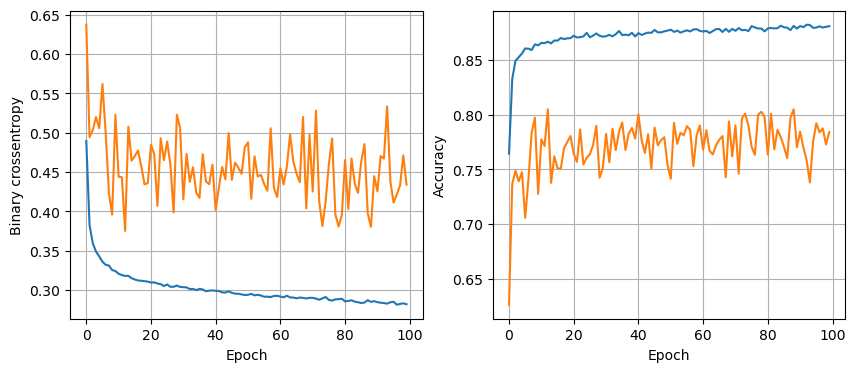

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8728
16 nodes, dropout 0, lr 0.001, batch size 32


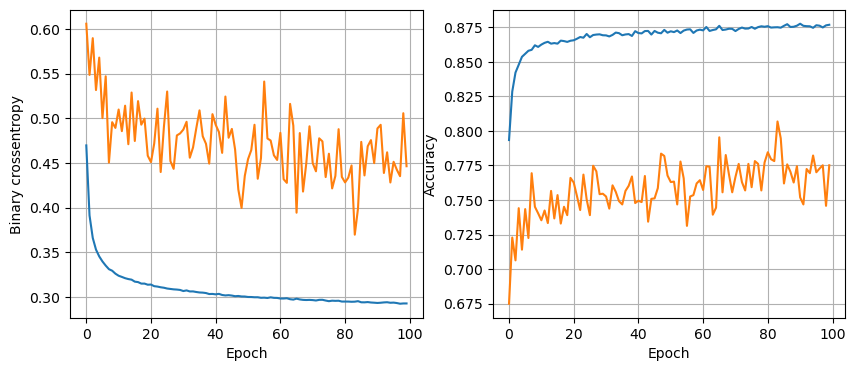

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8728
16 nodes, dropout 0, lr 0.001, batch size 64


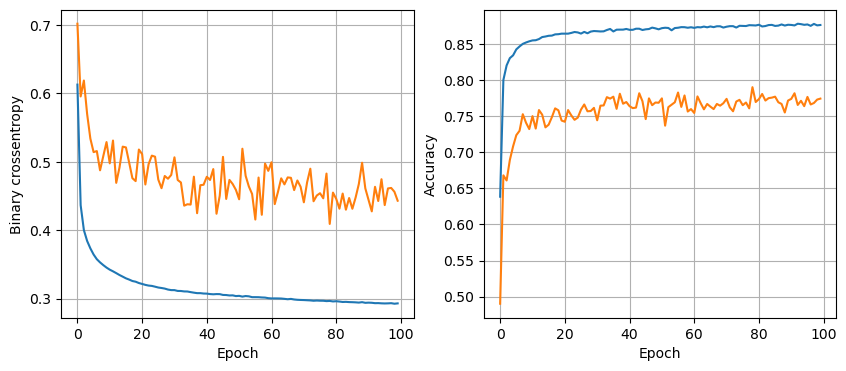

119/119 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.001, batch size 128


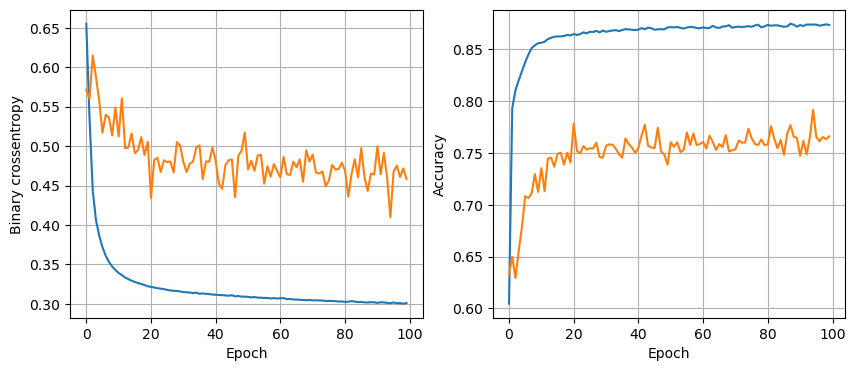

119/119 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8699
16 nodes, dropout 0.2, lr 0.01, batch size 32


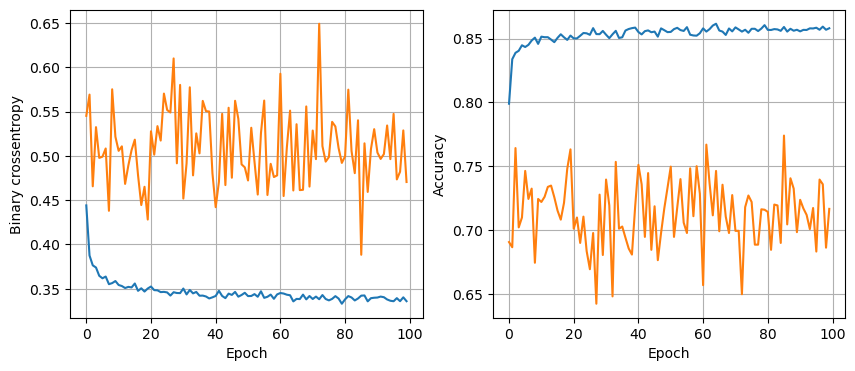

119/119 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8609
16 nodes, dropout 0.2, lr 0.01, batch size 64


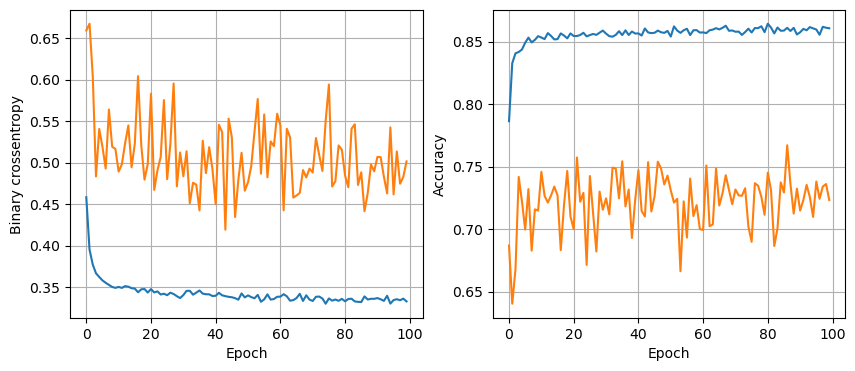

119/119 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.01, batch size 128


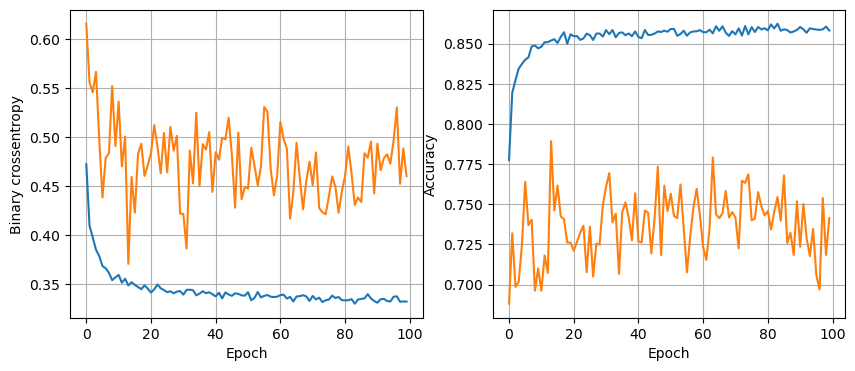

119/119 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.005, batch size 32


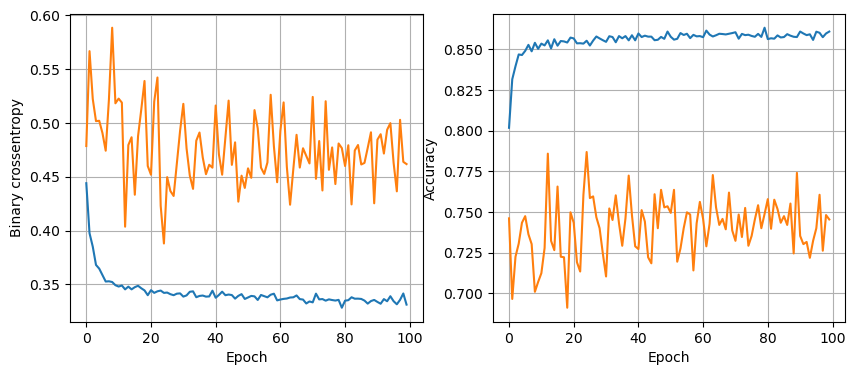

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8741
16 nodes, dropout 0.2, lr 0.005, batch size 64


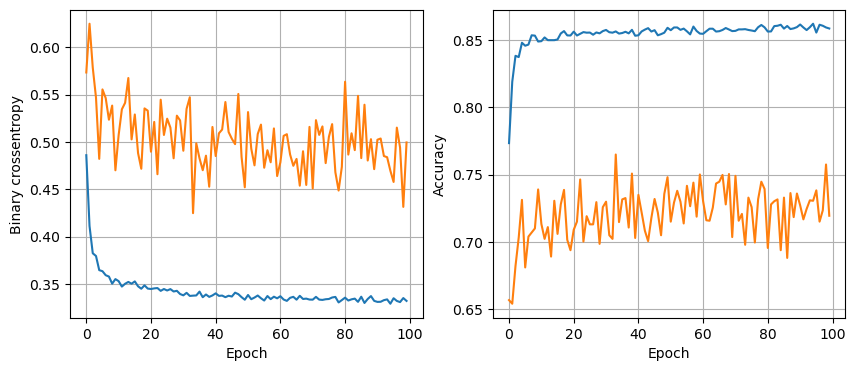

119/119 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.005, batch size 128


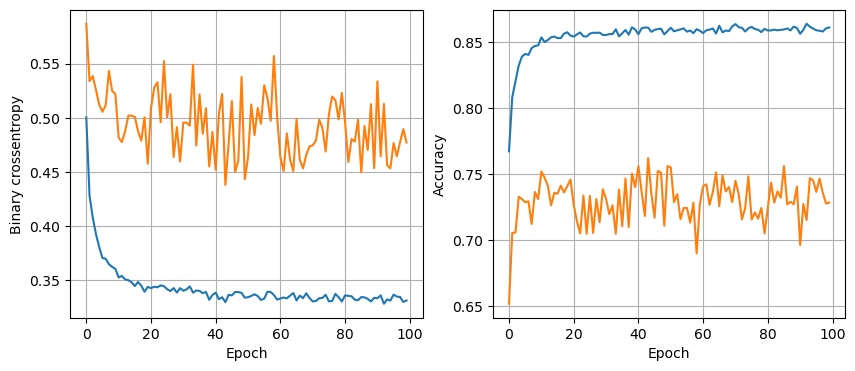

119/119 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.001, batch size 32


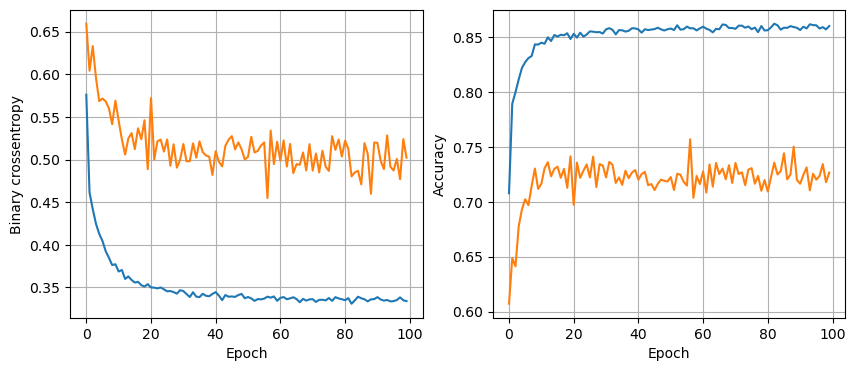

119/119 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8628
16 nodes, dropout 0.2, lr 0.001, batch size 64


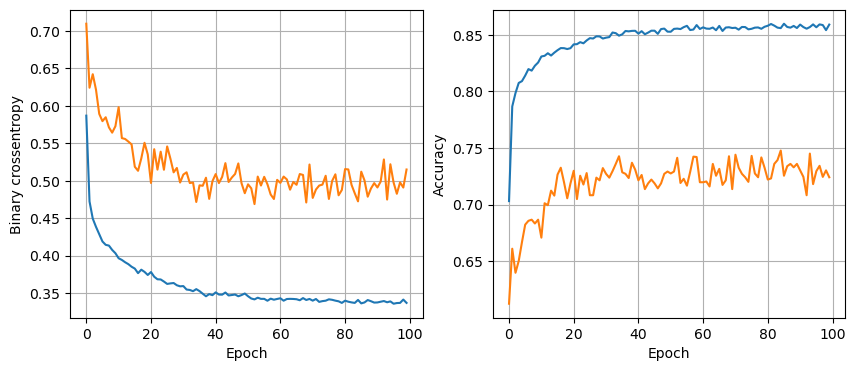

119/119 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8620
16 nodes, dropout 0.2, lr 0.001, batch size 128


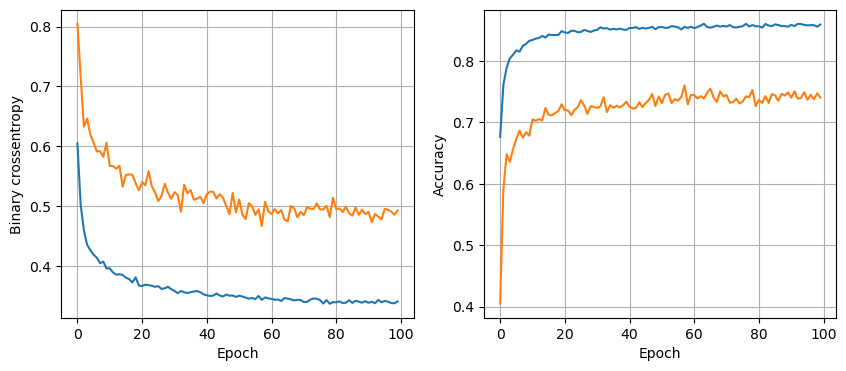

119/119 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.01, batch size 32


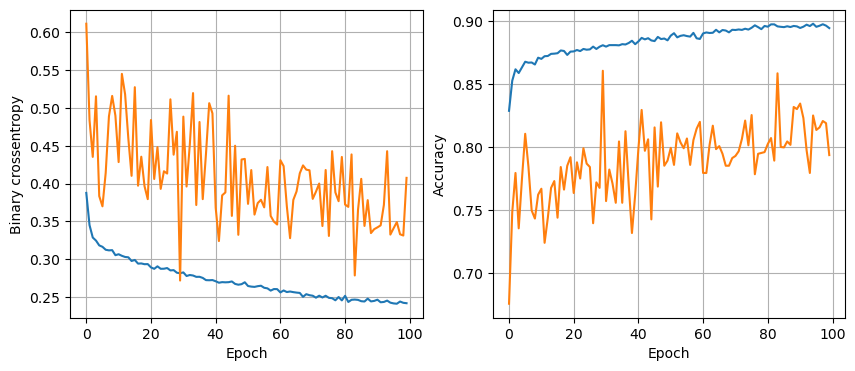

119/119 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8554
32 nodes, dropout 0, lr 0.01, batch size 64


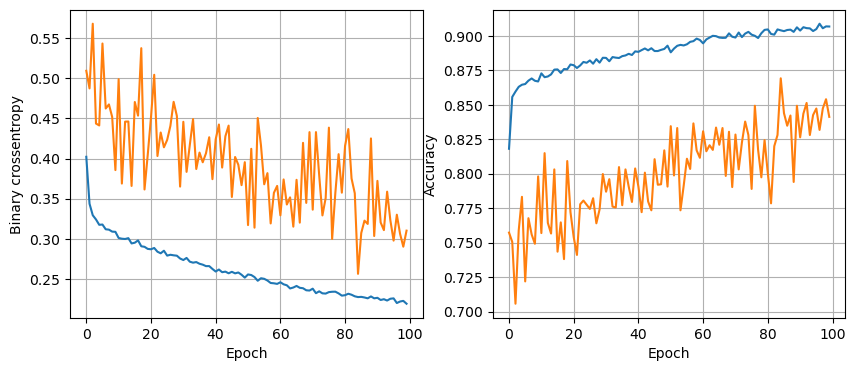

119/119 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.01, batch size 128


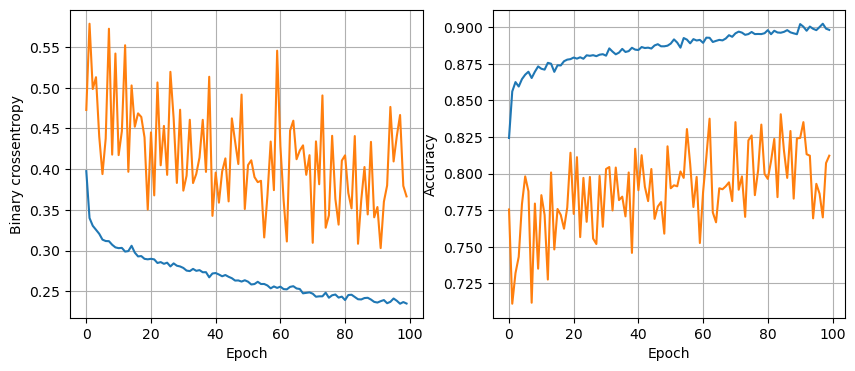

119/119 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.005, batch size 32


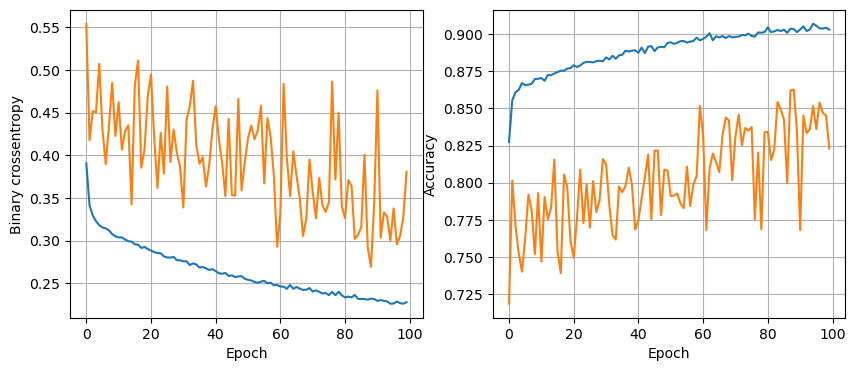

119/119 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8659
32 nodes, dropout 0, lr 0.005, batch size 64


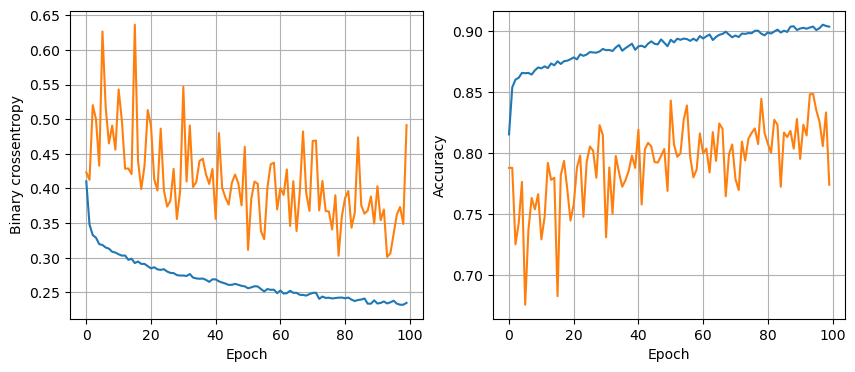

119/119 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.005, batch size 128


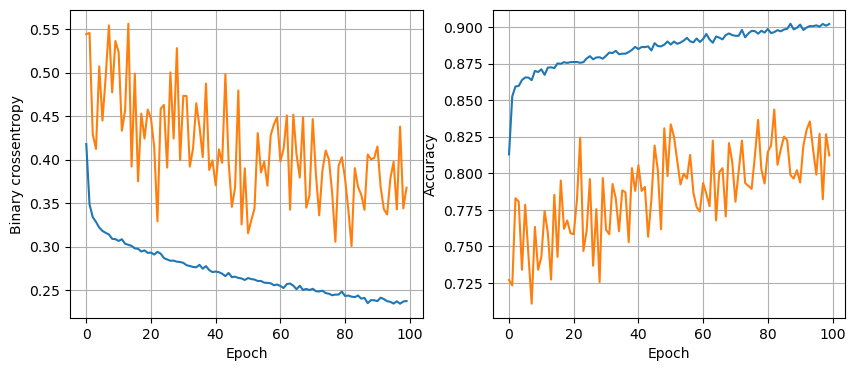

119/119 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.001, batch size 32


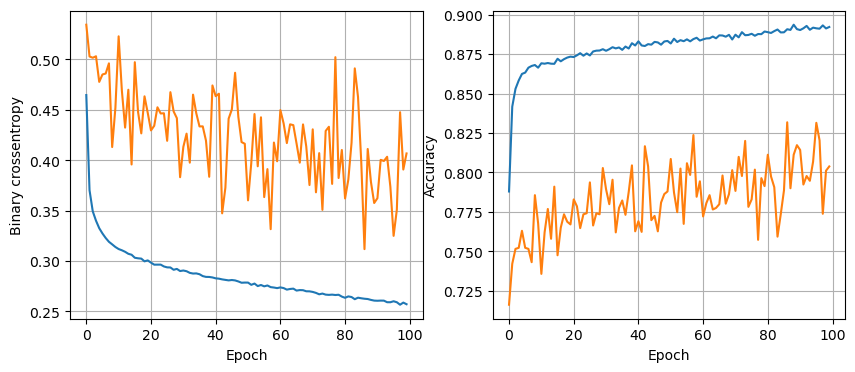

119/119 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.8623
32 nodes, dropout 0, lr 0.001, batch size 64


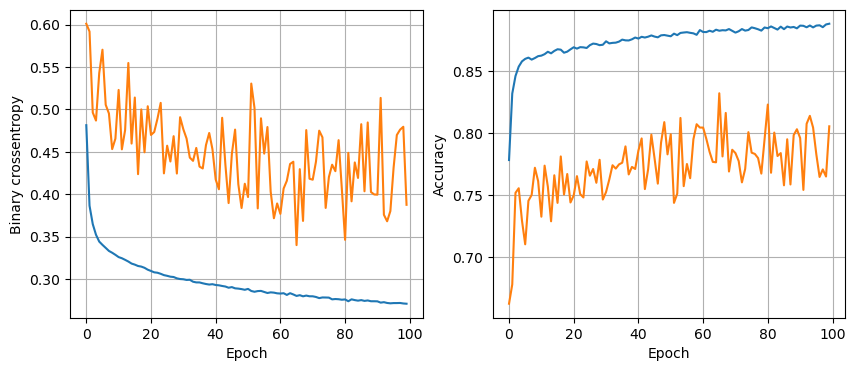

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.001, batch size 128


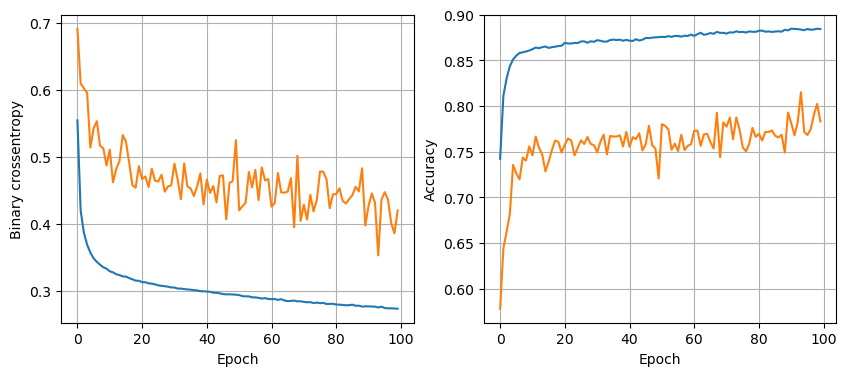

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.01, batch size 32


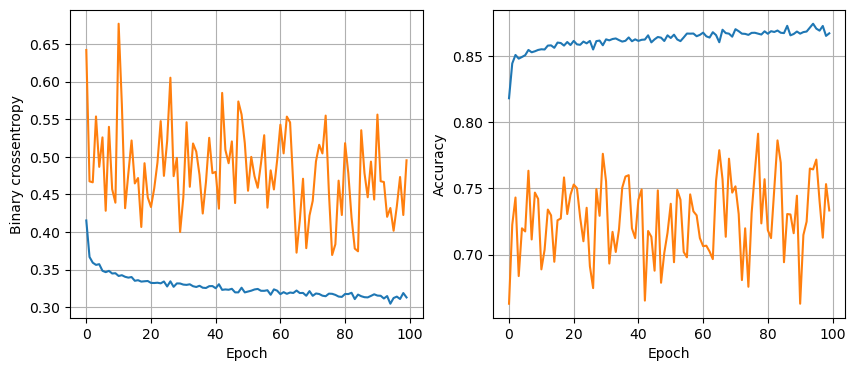

119/119 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8754
32 nodes, dropout 0.2, lr 0.01, batch size 64


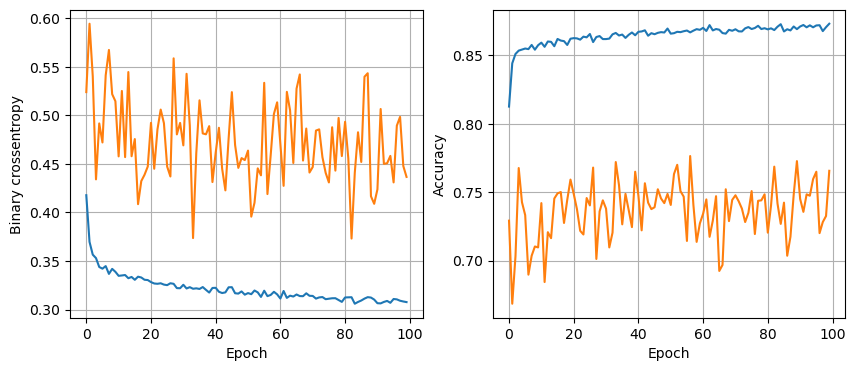

119/119 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8720
32 nodes, dropout 0.2, lr 0.01, batch size 128


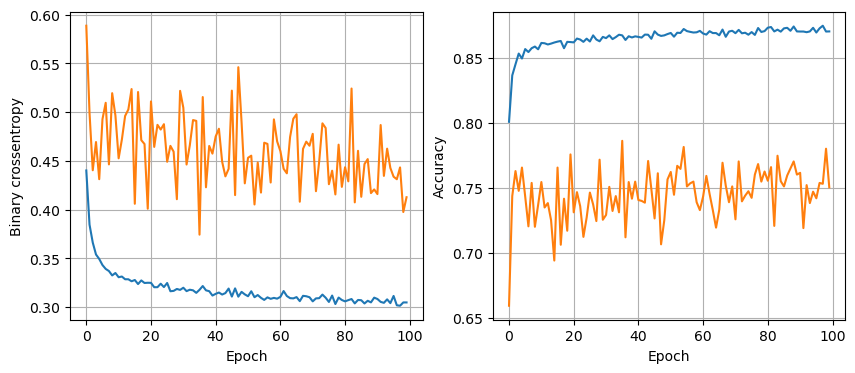

119/119 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.005, batch size 32


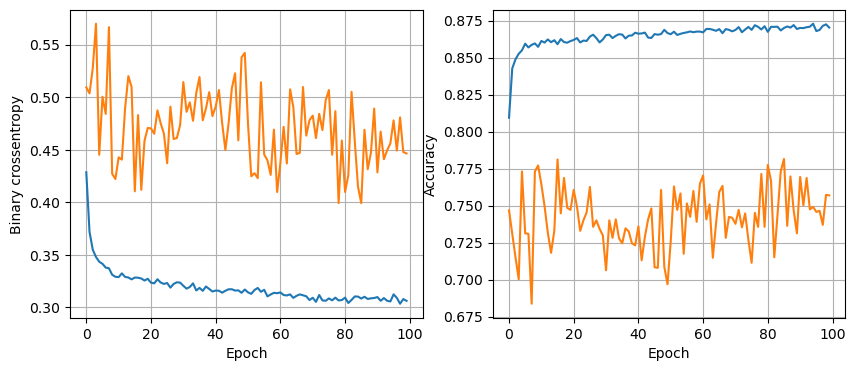

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8715
32 nodes, dropout 0.2, lr 0.005, batch size 64


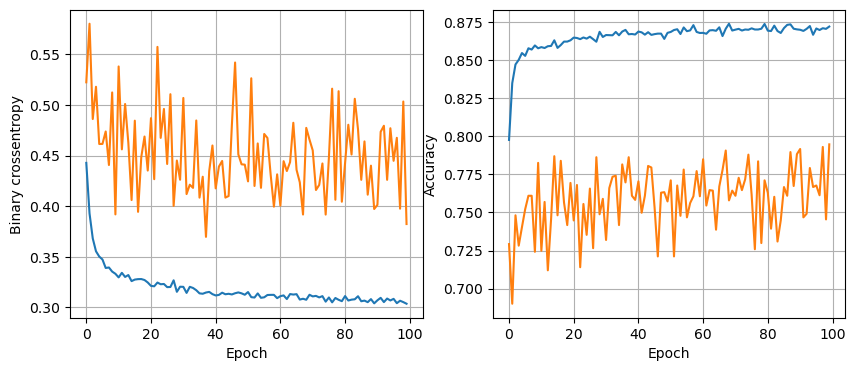

119/119 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.005, batch size 128


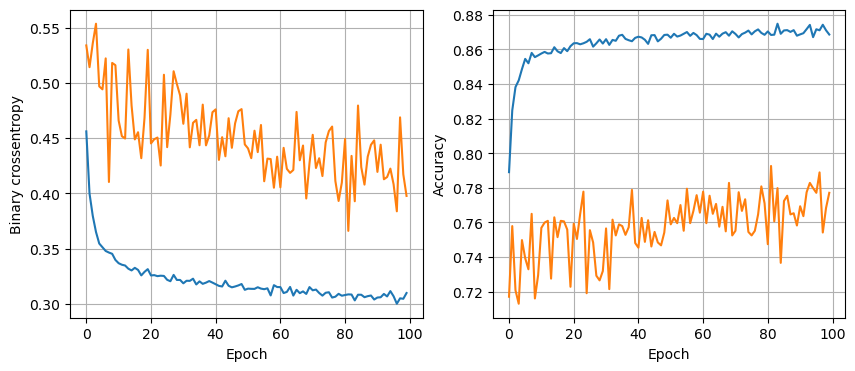

119/119 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.001, batch size 32


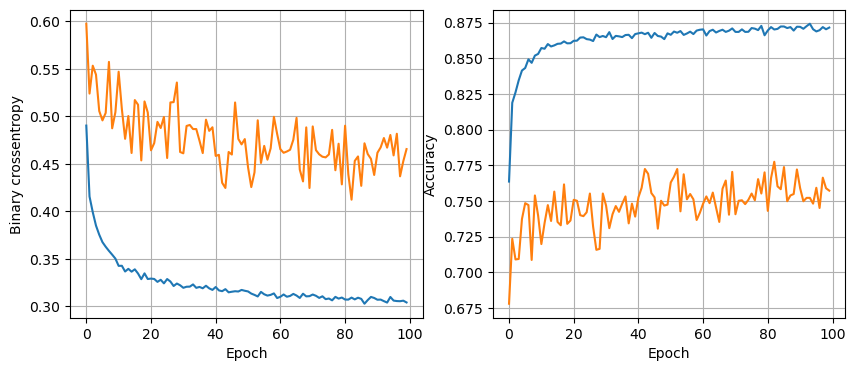

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8725
32 nodes, dropout 0.2, lr 0.001, batch size 64


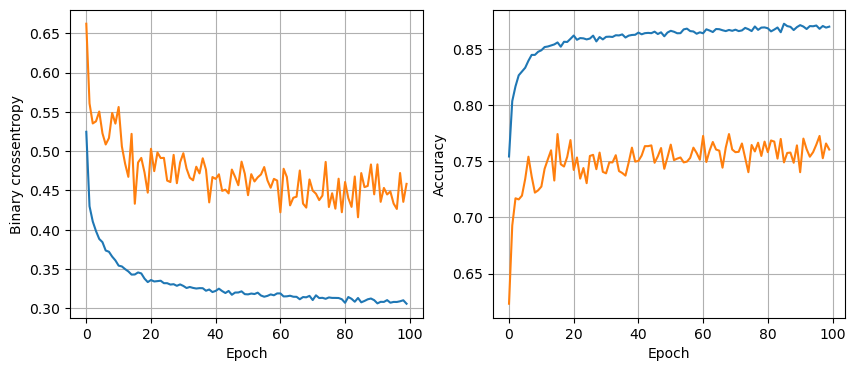

119/119 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.001, batch size 128


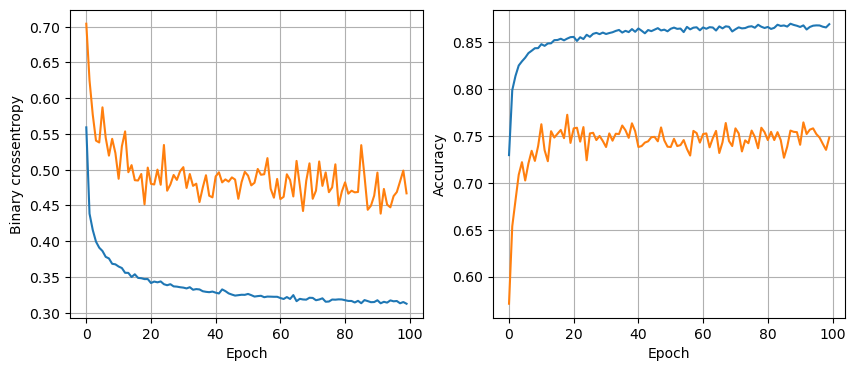

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.01, batch size 32


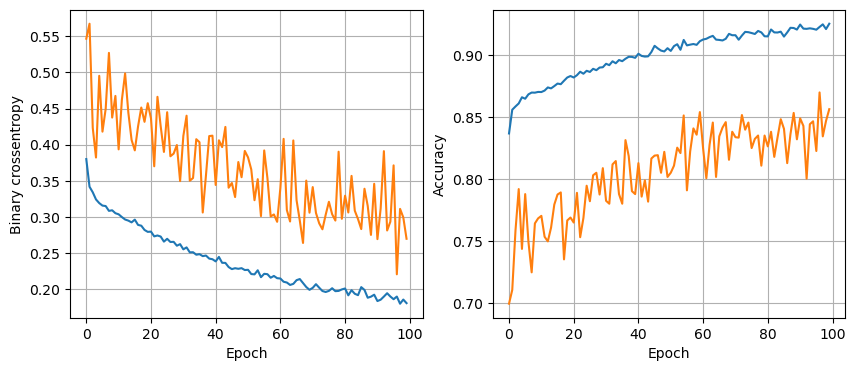

119/119 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.01, batch size 64


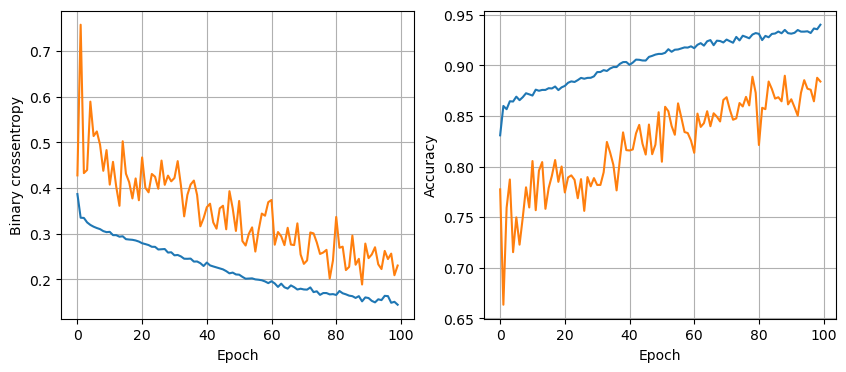

119/119 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.8567
64 nodes, dropout 0, lr 0.01, batch size 128


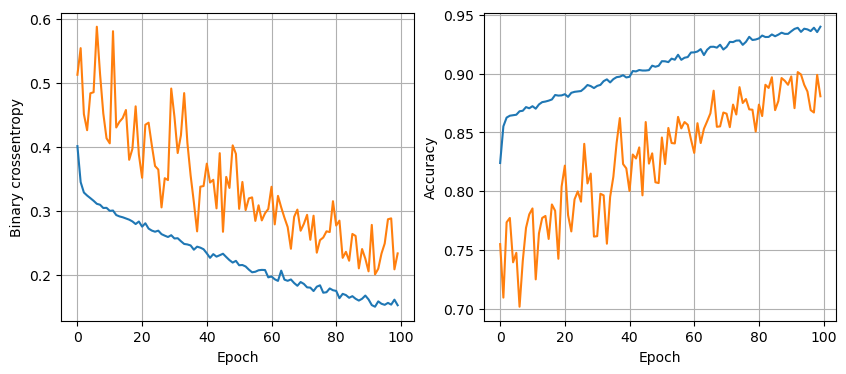

119/119 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.8536
64 nodes, dropout 0, lr 0.005, batch size 32


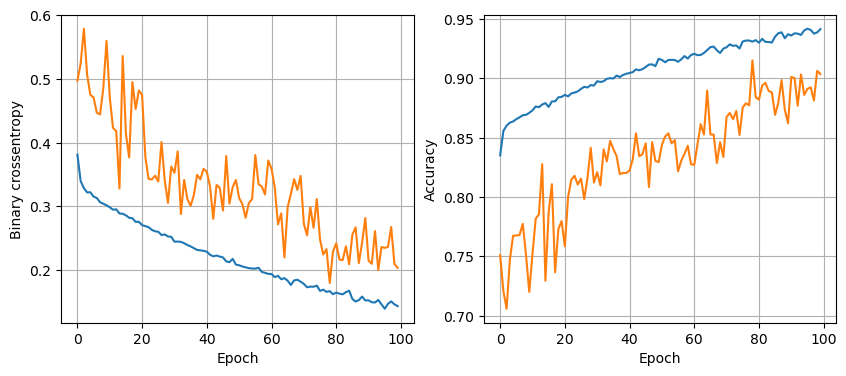

119/119 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.005, batch size 64


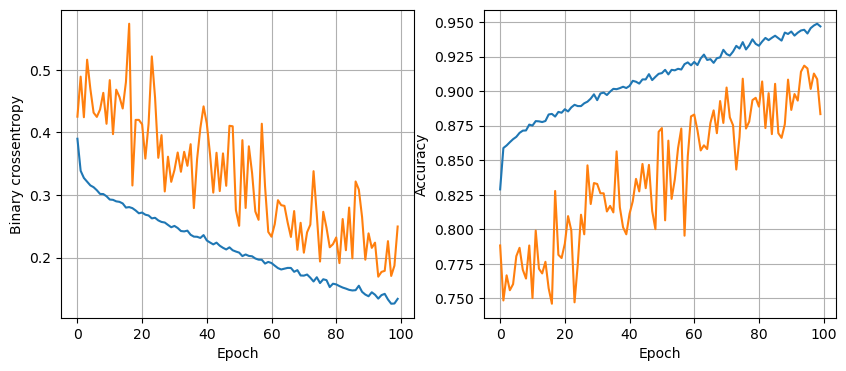

119/119 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.8594
64 nodes, dropout 0, lr 0.005, batch size 128


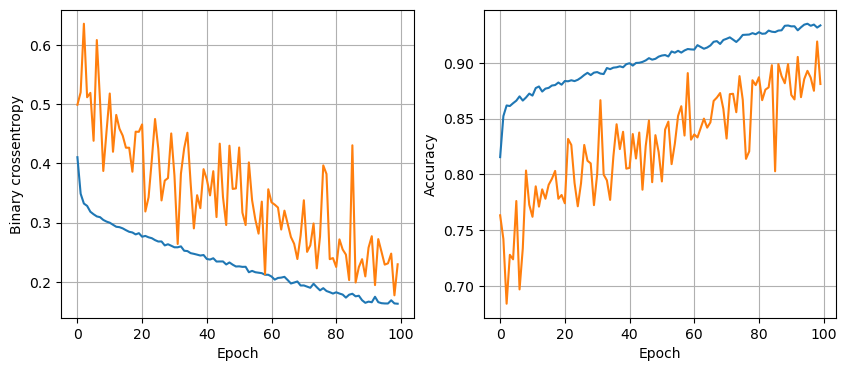

119/119 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.001, batch size 32


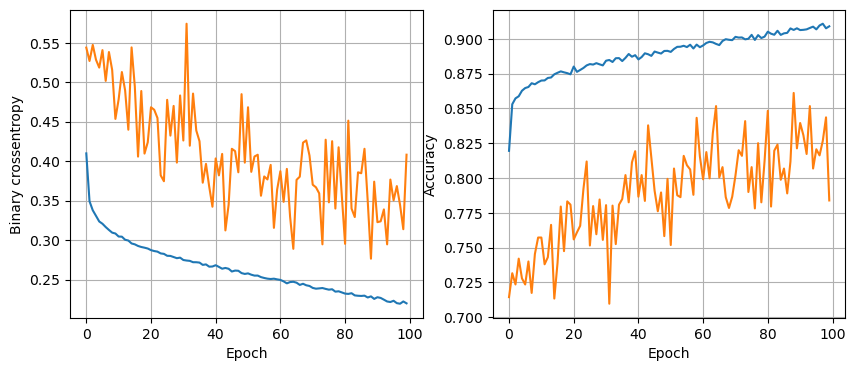

119/119 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8565
64 nodes, dropout 0, lr 0.001, batch size 64


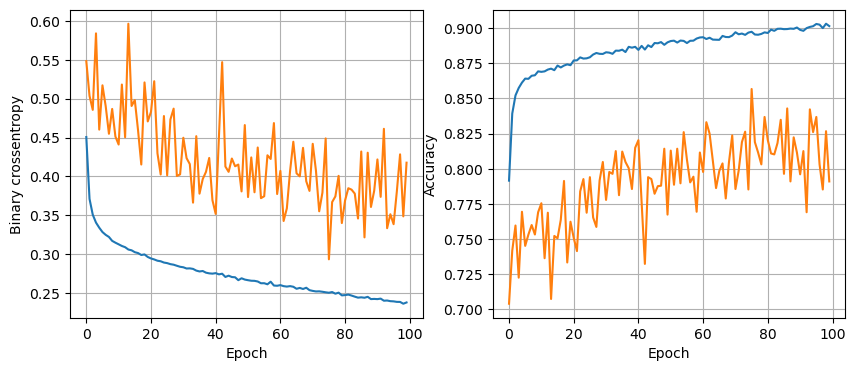

119/119 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8633
64 nodes, dropout 0, lr 0.001, batch size 128


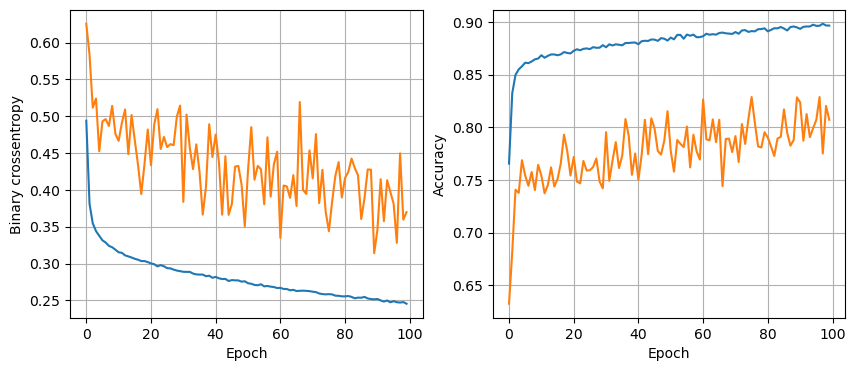

119/119 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8678
64 nodes, dropout 0.2, lr 0.01, batch size 32


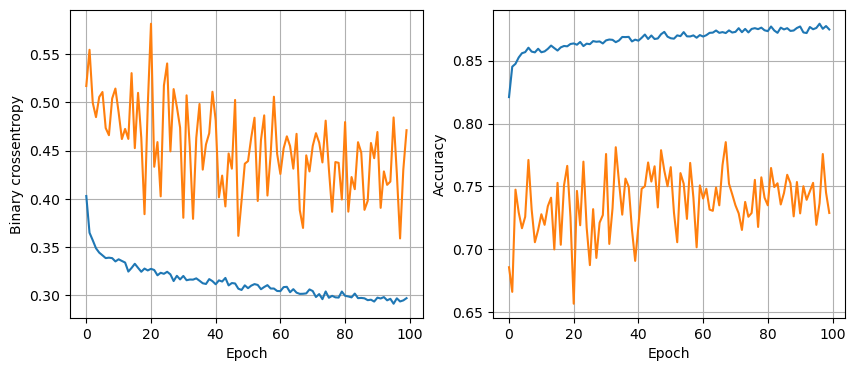

119/119 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8644
64 nodes, dropout 0.2, lr 0.01, batch size 64


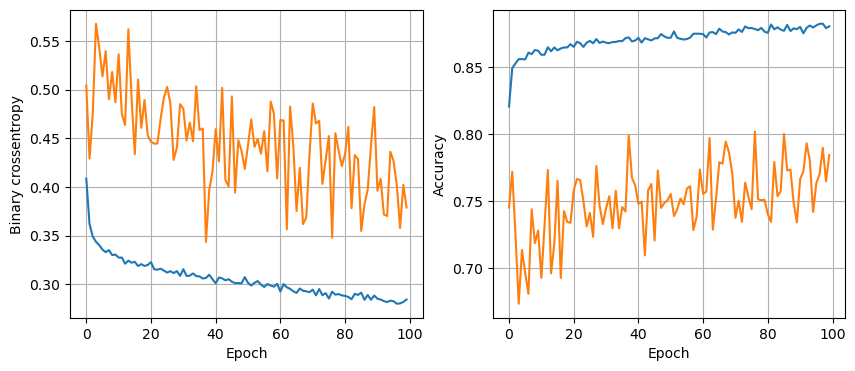

119/119 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.01, batch size 128


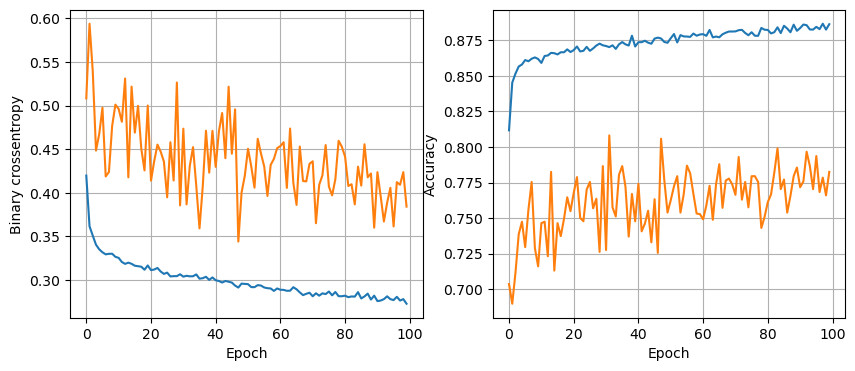

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8717
64 nodes, dropout 0.2, lr 0.005, batch size 32


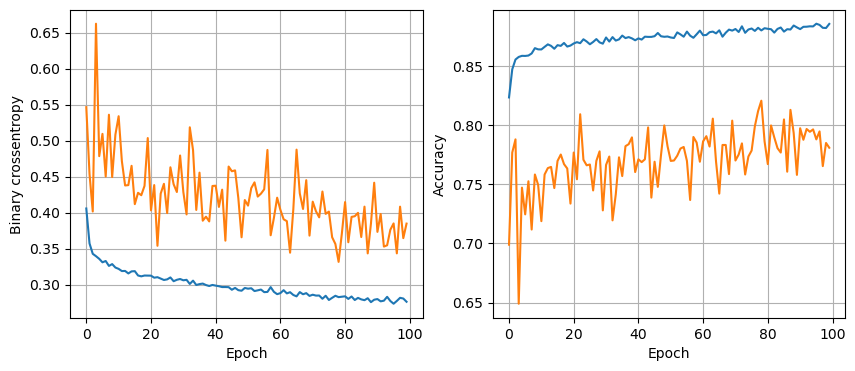

119/119 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8672
64 nodes, dropout 0.2, lr 0.005, batch size 64


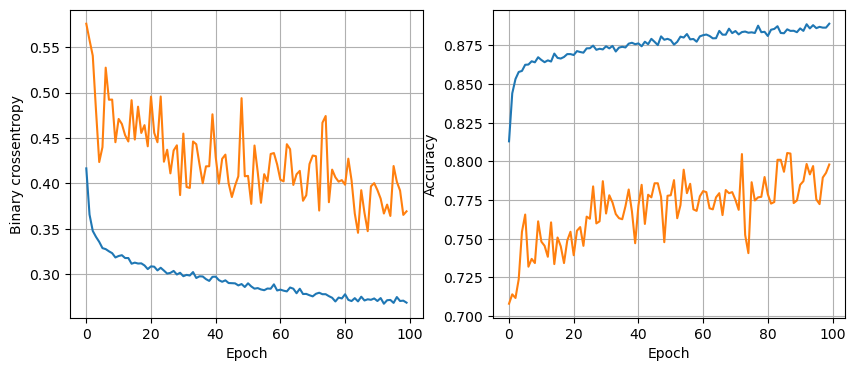

119/119 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8720
64 nodes, dropout 0.2, lr 0.005, batch size 128


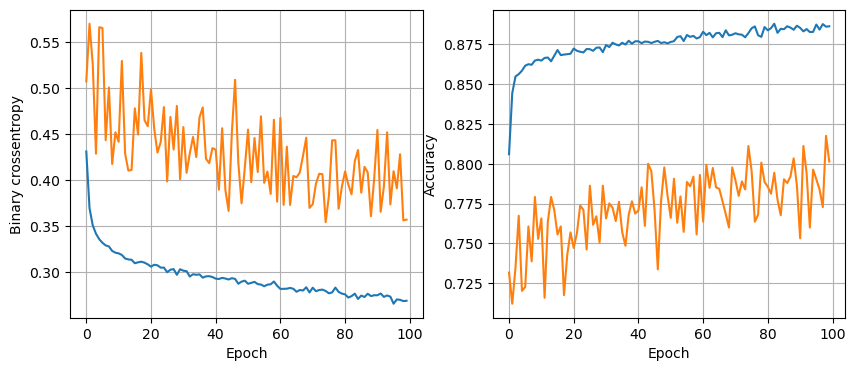

119/119 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.001, batch size 32


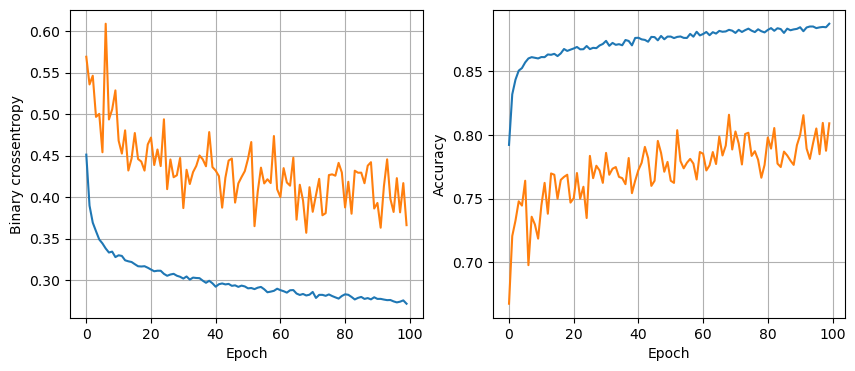

119/119 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.001, batch size 64


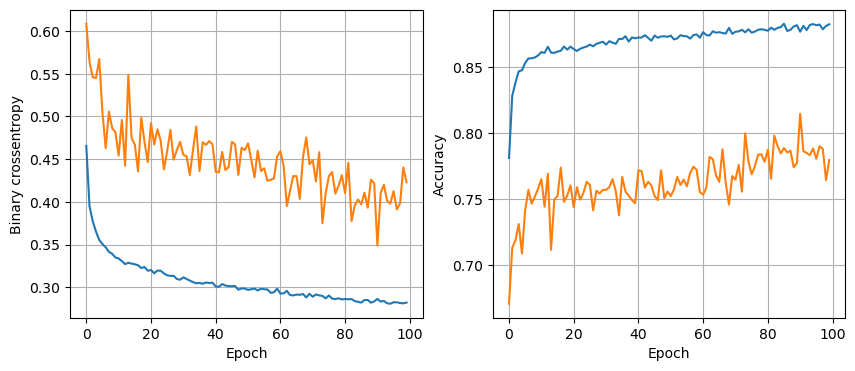

119/119 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8791
64 nodes, dropout 0.2, lr 0.001, batch size 128


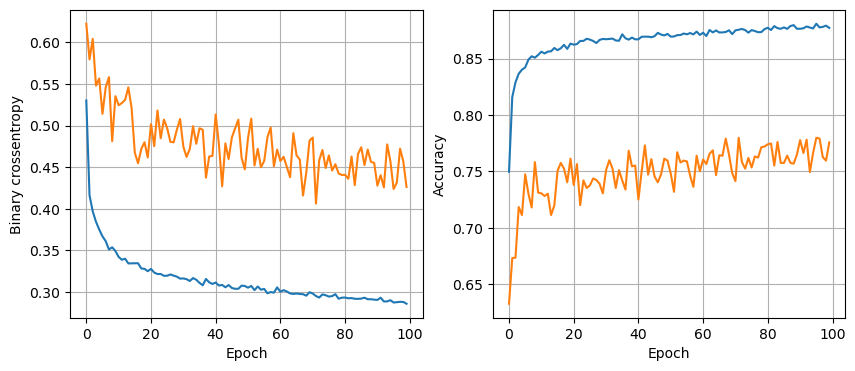

119/119 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.8762


In [31]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [32]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1294
           1       0.88      0.95      0.91      2510

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



Support Vector Machine

In [35]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [37]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1294
           1       0.89      0.90      0.90      2510

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [40]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1294
           1       0.85      0.81      0.83      2510

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804

